In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics, tree

In [2]:
train_data = pd.read_csv('./Titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('./Titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#################### TASK 1 ####################
# Question 1

# Create new feature labeled 'Gender'
Gender = {'male': 0, 'female': 1}
train_data['Gender'] = [Gender[item] for item in train_data.Sex]
train_data.head()

# Fill in missing Ages
columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']

imputer = KNNImputer()
new_data = imputer.fit_transform(train_data[columns])

for i in range(train_data.shape[0]):
    train_data['Age'].at[i] = int(new_data[i, 1] + 0.5)
    
# Fill in missing Embarked
missing_embarked = train_data['Embarked'].isnull()
mode_embarked = train_data['Embarked'].mode().item()

for i in range(len(missing_embarked)):
    if missing_embarked[i]:
        test_data['Embarked'].at[i] = mode_embarked
        
# Fill in missing Fare
missing_fare = test_data['Fare'].isnull()
mode_fare = test_data['Fare'].mode().item()

for i in range(len(missing_fare)):
    if missing_fare[i]:
        test_data['Fare'].at[i] = mode_fare
        
# Categorize Fare values
train_data.loc[((train_data.Fare > -0.001) & (train_data.Fare <= 7.91)), 'Fare'] = 0
train_data.loc[((train_data.Fare > 7.91) & (train_data.Fare <= 14.454)), 'Fare'] = 1
train_data.loc[((train_data.Fare > 14.454) & (train_data.Fare <= 31)), 'Fare'] = 2
train_data.loc[((train_data.Fare > 31) & (train_data.Fare <= 512.329)), 'Fare'] = 3

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3.0,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1.0,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.0,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1.0,NaN,S,0


In [5]:
# Question 2

# Gender Feature Selection
women = train_data.loc[train_data.Gender == 1]['Survived']
men = train_data.loc[train_data.Gender == 0]['Survived']
rate_women = sum(women)/len(women)
rate_men = sum(men)/len(men)

print('% of women who survived:', rate_women)
print('% of men who survived:', rate_men)

# Age Feature Selection
infants = train_data.loc[train_data.Age <= 4]['Survived']
elder = train_data.loc[train_data.Age >= 80]['Survived']
average = train_data.loc[((train_data.Age > 14) & (train_data.Age < 26))]['Survived']
rate_infants = sum(infants)/len(infants)
rate_elder = sum(elder)/len(elder)
rate_average = sum(average)/len(average)

print()
print('% of infants who survived:', rate_infants)
print('% of elderly who survived:', rate_elder)
print('% of average age who surived:', rate_average)

# Pclass Feature Selection
class1 = train_data.loc[train_data.Pclass == 1]['Survived']
class2 = train_data.loc[train_data.Pclass == 2]['Survived']
class3 = train_data.loc[train_data.Pclass == 3]['Survived']
rate_class1 = sum(class1)/len(class1)
rate_class2 = sum(class2)/len(class2)
rate_class3 = sum(class3)/len(class3)

print()
print('% of Class 1 who survived:', rate_class1)
print('% of Class 2 who survived:', rate_class2)
print('% of Class 3 who survived:', rate_class3)

# Fare Feature Selection
fare0 = train_data.loc[train_data.Fare == 0.0]['Survived']
fare1 = train_data.loc[train_data.Fare == 1.0]['Survived']
fare2 = train_data.loc[train_data.Fare == 2.0]['Survived']
fare3 = train_data.loc[train_data.Fare == 3.0]['Survived']
rate_fare0 = sum(fare0)/len(fare0)
rate_fare1 = sum(fare1)/len(fare1)
rate_fare2 = sum(fare2)/len(fare2)
rate_fare3 = sum(fare3)/len(fare3)

print()
print('% of Fare 0 who survived:', rate_fare0)
print('% of Fare 1 who survived:', rate_fare1)
print('% of Fare 2 who survived:', rate_fare2)
print('% of Fare 3 who survived:', rate_fare3)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924

% of infants who survived: 0.675
% of elderly who survived: 1.0
% of average age who surived: 0.3574144486692015

% of Class 1 who survived: 0.6296296296296297
% of Class 2 who survived: 0.47282608695652173
% of Class 3 who survived: 0.24236252545824846

% of Fare 0 who survived: 0.19730941704035873
% of Fare 1 who survived: 0.3087557603686636
% of Fare 2 who survived: 0.44541484716157204
% of Fare 3 who survived: 0.5753424657534246


Average Accuracy: 0.7890716213671458


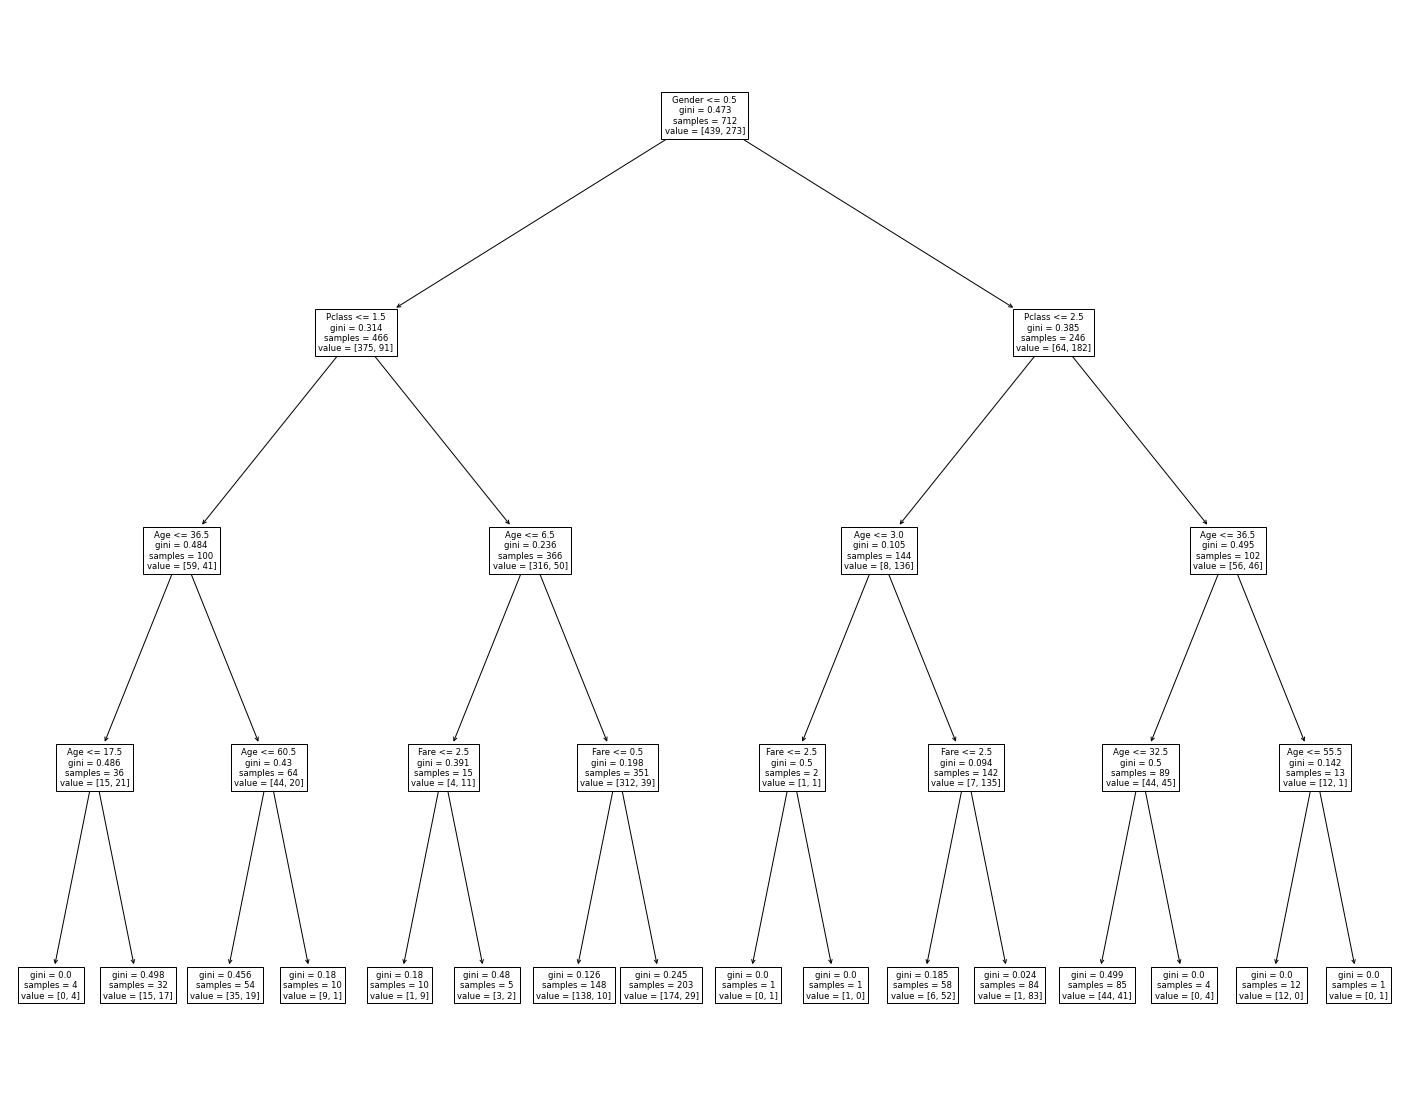

In [10]:
# Question 3
y = train_data['Survived']

features = ['Gender', 'Age', 'Pclass', 'Fare']
X = train_data[features]

DT = DecisionTreeClassifier(max_depth=4)

retval = cross_validate(DT, X, y, cv=5, return_estimator=True)
print('Average Accuracy:', retval['test_score'].mean())

fig = plt.figure(figsize=(25, 20))
tree.plot_tree(retval['estimator'][0], feature_names=features)
plt.show()

In [17]:
# Question 4
y = train_data['Survived']

features = ['Gender', 'Age', 'Pclass', 'Fare']
X = train_data[features]

RF = RandomForestClassifier()

retval = cross_validate(RF, X, y, cv=5, return_estimator=True)
print('Average Accuracy:', retval['test_score'].mean())

Average Accuracy: 0.8092524009792228
